In [1]:
from sympy import *
from sympy import sqrt
from sympy.matrices import *

In [2]:
from sympy.abc import m, x, g, u, l, a, k, y, delta, mu, sigma, k, alpha, epsilon
init_printing()

In [76]:
A, m_1, m_2, x, g, u, l, a, k, y, delta_x, mu, sigma, k, alpha, epsilon, t, v= symbols("A m_1 m_2 x g u l a k y delta_x mu sigma k alpha epsilon t v", real = True)

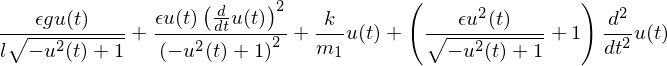

In [4]:
eqn =(1+epsilon *u(t)**2/sqrt(1-u(t)**2))*diff(u(t),t,t) + epsilon* u(t) *diff(u(t),t)**2/(1-u(t)**2)**2+k/m_1*u(t)+epsilon * g * u(t)/l/sqrt(1-u(t)**2)
eqn#This equation is equal to zero

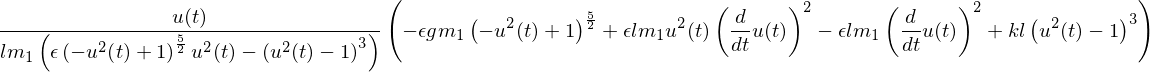

In [5]:
#Solve for the acceleration
udd = solve(eqn,diff(u(t),t,t)) 
udd[0]

Taylor series expansion. Mathematica might have been more convenient, but with some patience, in long form. 

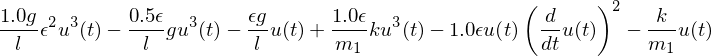

In [6]:
udd_simp = udd[0].subs({u(t):0,diff(u(t),t):0})\
+diff(udd[0],u(t)).subs({u(t):0,diff(u(t),t):0})*u(t)\
+diff(udd[0],diff(u(t),t)).subs({u(t):0,diff(u(t),t):0})*diff(u(t),t)\
+diff(udd[0],u(t),diff(u(t),t)).subs({u(t):0,diff(u(t),t):0})*u(t)*diff(u(t),t)\
+1/2*diff(udd[0],u(t),2).subs({u(t):0,diff(u(t),t):0})*u(t)**2\
+1/2*diff(udd[0],diff(u(t),t),2).subs({u(t):0,diff(u(t),t):0})*diff(u(t),t)**2\
+1/2*diff(udd[0],u(t),2,diff(u(t),t)).subs({u(t):0,diff(u(t),t):0})*u(t)**2*diff(u(t),t)\
+1/2*diff(udd[0],u(t),diff(u(t),t),2).subs({u(t):0,diff(u(t),t):0})*u(t)*diff(u(t),t)**2\
+1/6*diff(udd[0],u(t),3).subs({u(t):0,diff(u(t),t):0})*u(t)**3\
+1/6*diff(udd[0],diff(u(t),t),3).subs({u(t):0,diff(u(t),t):0})*diff(u(t),t)**3\

udd_simp.expand()

Here are the fixed points

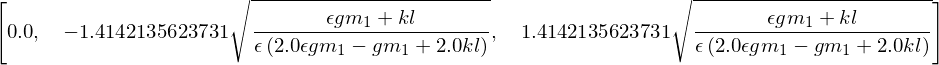

In [7]:
fps = solve(udd_simp.subs(diff(u(t),t),0),u(t))
fps

eigenvalues (on right) at 0 fixed point show a center. 

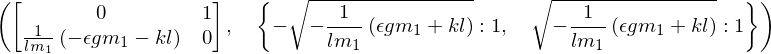

In [8]:
A = Matrix([[0,1],[diff(udd_simp,u(t)),diff(udd_simp,diff(u(t),t))]]).subs({u(t):fps[0],diff(u(t),t):0})
(A,A.eigenvals())

Interesting enough, the analysis seems to fail. One has to be very concerned about centers found in locations other than where you have already linearized. 

This methodology was "copied" from "elsewhere". It's clearly botched up. However, this is what I asked. What you see is that the other two fixed points yield saddles, and will thus not be attractors. 

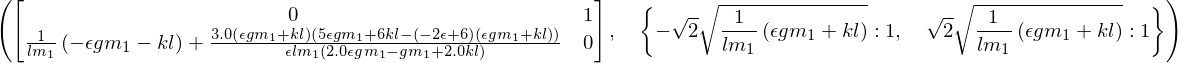

In [9]:
A = Matrix([[0,1],[diff(udd_simp,u(t)),diff(udd_simp,diff(u(t),t))]]).subs({u(t):fps[1],diff(u(t),t):0})
(A,A.eigenvals())

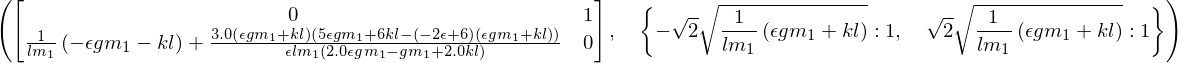

In [10]:
A = Matrix([[0,1],[diff(udd_simp,u(t)),diff(udd_simp,diff(u(t),t))]]).subs({u(t):fps[2],diff(u(t),t):0})
(A,A.eigenvals())

What happens if I just skip the entire Taylor series expansion... can I solve this? Recall $\ddot{u}(t)$ 



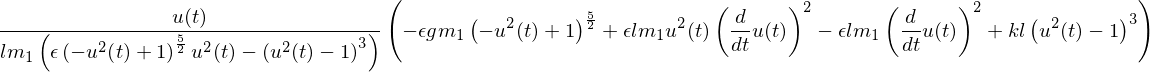

In [37]:
udd[0]

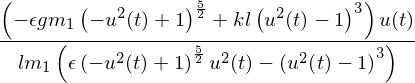

In [17]:
eqn_for_fixed = udd[0].subs({diff(u(t),t):0})
eqn_for_fixed

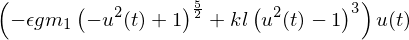

In [34]:
numerator = fraction(eqn_for_fixed)[0]
numerator

In [38]:
full_fixed = solve(numerator,u(t))

So that gives us 3 fixed points that don't even depend on the parameters. 

That's what I thought... because I know the system (you didn't). The reality is that there is only one fixed point. The other solution likely gave a correct estimation of the linearized state matrix. Let's check, just to be sure. 

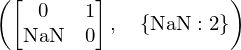

In [40]:
A = Matrix([[0,1],[diff(udd[0],u(t)),diff(udd[0],diff(u(t),t))]]).subs({u(t):full_fixed[0],diff(u(t),t):0})
(A,A.eigenvals())

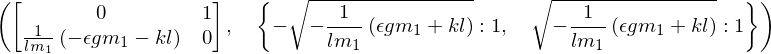

In [41]:
A = Matrix([[0,1],[diff(udd[0],u(t)),diff(udd[0],diff(u(t),t))]]).subs({u(t):full_fixed[1],diff(u(t),t):0})
(A,A.eigenvals())

Look familiar?

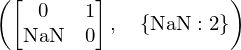

In [42]:
A = Matrix([[0,1],[diff(udd[0],u(t)),diff(udd[0],diff(u(t),t))]]).subs({u(t):full_fixed[2],diff(u(t),t):0})
(A,A.eigenvals())

So, this is very odd. We found two fixed points, and... we can't even determine the eigenvalues. 

What if we solve the as-written equation for the fixed points... 

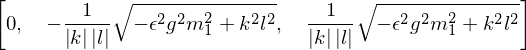

In [51]:
solve(eqn.subs({diff(u(t),t,2):0,diff(u(t),t,1):0}),u(t))

In [52]:
solve(eqn.subs({diff(u(t),t,2):0,diff(u(t),t,1):0}),u(t))[2].subs({k:1,epsilon:.1, g:9.8, l:1, m_1:1})

I'm perplexed as to why we get two separate sets of fixed points. 

In [54]:
%run Nonlinear_Dynamics
%matplotlib inline

In [77]:
python(udd[0].subs({u(t):x,diff(u(t),t):v}))#I can almost copy and paste this. 

"x = Symbol('x')\nepsilon = Symbol('epsilon')\ng = Symbol('g')\nm_1 = Symbol('m_1')\nl = Symbol('l')\nv = Symbol('v')\nk = Symbol('k')\ne = x*(-epsilon*g*m_1*(-x**2 + 1)**Rational(5, 2) + epsilon*l*m_1*v**2*x**2 - epsilon*l*m_1*v**2 + k*l*(x**2 - 1)**3)/(l*m_1*(epsilon*x**2*(-x**2 + 1)**Rational(5, 2) - (x**2 - 1)**3))"

In [59]:
def wacky_deriv(x_v, t, epsilon = 0.1, k=1, g = 9.8, l = 1, m_1 = 1):
    x, v = x_v
    return [v, (-epsilon*g*m_1*(-x**2 + 1)**(5./ 2) + epsilon*l*m_1*x**2*v**2 - epsilon*l*m_1*v**2 + k*l*(x**2 - 1)**3)*x/(l*m_1*(epsilon*(-x**2 + 1)**(5./ 2)*x**2 - (x**2 - 1)**3))]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


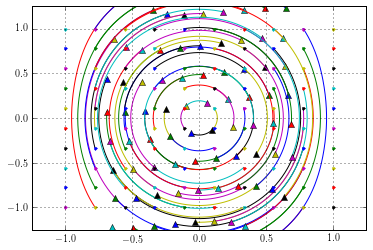

In [74]:
phase_plot(wacky_deriv)